Primero que nada, como el profesor me sugurió, creamos una función que sólo calcula la suma de Riemann, pero que no grafique, ya que para n=1000 toma muchas horas, y a veces nunca termina su ejecución, ya que el computador queda sin memoria disponible:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import os

def calculate_riemann_sum(x_range, y_range, nx, ny, f, mask=None):
    """
    Grafica paralelepípedos para suma de Riemann.

    Parámetros:
    -----------
    x_range : tuple (xmin, xmax)
    y_range : tuple (ymin, ymax)
    nx, ny : int - número de particiones en x e y
    f : función f(x, y) - altura
    mask : función mask(x, y) - retorna True si (x,y) está en la región (opcional)
    """
    xmin, xmax = x_range
    ymin, ymax = y_range

    # Crear particiones usando linspace (vértices de los rectángulos)
    x_vertices = np.linspace(xmin, xmax, nx + 1)
    y_vertices = np.linspace(ymin, ymax, ny + 1)

    # Calcular dx, dy
    dx = (xmax - xmin) / nx
    dy = (ymax - ymin) / ny

    suma = 0
    for i in range(nx):
        for j in range(ny):
            # Vértices del rectángulo en la base
            x0, x1 = x_vertices[i], x_vertices[i + 1]
            y0, y1 = y_vertices[j], y_vertices[j + 1]

            # Centro del rectángulo
            X = (x0 + x1) / 2
            Y = (y0 + y1) / 2

            # Verificar máscara usando el centro
            if mask is not None and not mask(X, Y):
                continue

            # Altura evaluada en el centro
            z = f(X, Y)
            if z == 0:
                continue

            suma += z * dx * dy

    return suma

Copiamos la función entregada en la tarea, la que grafica y calcula la suma de Riemann:

In [3]:
def graficar_riemann(x_range, y_range, nx, ny, f, mask=None, color='steelblue', alpha=0.8):
    """
    Grafica paralelepípedos para suma de Riemann.

    Parámetros:
    -----------
    x_range : tuple (xmin, xmax)
    y_range : tuple (ymin, ymax)
    nx, ny : int - número de particiones en x e y
    f : función f(x, y) - altura
    mask : función mask(x, y) - retorna True si (x,y) está en la región (opcional)
    """
    xmin, xmax = x_range
    ymin, ymax = y_range

    # Crear particiones usando linspace (vértices de los rectángulos)
    x_vertices = np.linspace(xmin, xmax, nx + 1)
    y_vertices = np.linspace(ymin, ymax, ny + 1)

    # Calcular dx, dy
    dx = (xmax - xmin) / nx
    dy = (ymax - ymin) / ny

    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    suma = 0
    for i in range(nx):
        for j in range(ny):
            # Vértices del rectángulo en la base
            x0, x1 = x_vertices[i], x_vertices[i + 1]
            y0, y1 = y_vertices[j], y_vertices[j + 1]

            # Centro del rectángulo
            X = (x0 + x1) / 2
            Y = (y0 + y1) / 2

            # Verificar máscara usando el centro
            if mask is not None and not mask(X, Y):
                continue

            # Altura evaluada en el centro
            z = f(X, Y)
            if z == 0:
                continue

            suma += z * dx * dy

            v = np.array([
                [x0, y0, 0], [x1, y0, 0], [x1, y1, 0], [x0, y1, 0],
                [x0, y0, z], [x1, y0, z], [x1, y1, z], [x0, y1, z],
            ])

            caras = [
                [v[0], v[1], v[5], v[4]], [v[2], v[3], v[7], v[6]],
                [v[0], v[3], v[7], v[4]], [v[1], v[2], v[6], v[5]],
                [v[0], v[1], v[2], v[3]], [v[4], v[5], v[6], v[7]],
            ]

            ax.add_collection3d(Poly3DCollection(caras, alpha=alpha,
                                                 facecolors=color,
                                                 edgecolors='black',
                                                 linewidths=0.2,
                                                 zsort='average'))

    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_zlabel('z', fontsize=12)
    ax.set_title(f'Suma de Riemann: {suma:.4f}', fontsize=14)

    # Vista desde el origen hacia valores positivos
    ax.view_init(elev=35.26, azim=225)
    ax.dist = 20  # Aumentar distancia de la cámara (default es 20)

    plt.tight_layout()
    return fig, ax, suma

if __name__ == "__main__":
    # Crear carpeta outputs si no existe
    os.makedirs('outputs', exist_ok=True)
    
    # results_of_riemann = {
    #     'rectangulo_n_10': 0,
    #     'rectangulo_n_100': 0,
    #     'rectangulo_n_1000': 0,
    #     'circulo_n_10': 0,
    #     'circulo_n_100': 0,
    #     'circulo_n_1000': 0,
    #     'parabola_n_10': 0,
    #     'parabola_n_100': 0,
    #     'parabola_n_1000': 0,
    # }

    #ejemplo_trapecio()

Plots para las funciones, y creación de sus mask:

In [4]:

def ejemplo_trapecio(nx=20, ny=20):
    """
    Ejemplo 0: Función lineal f(x,y) = x + y
    Región de integración: Trapecio con vértices en (0,0), (2,0), (1.5,1), (0.5,1)
    """
    # Función lineal
    def f(x, y):
        return x + y

    # Máscara para región trapezoidal
    # Trapecio invertido: base inferior (pequeña) de (0.5,0) a (1.5,0), base superior (grande) de (0,1) a (2,1)
    def mask(x, y):
        # Verificar que esté dentro del rango vertical
        if y < 0 or y > 1:
            return False

        # Borde izquierdo: línea de (0,1) a (0.5,0)
        # Ecuación: x = 0.5 - 0.5*y
        borde_izq = 0.5 - 0.5 * y

        # Borde derecho: línea de (2,1) a (1.5,0)
        # Ecuación: x = 1.5 + 0.5*y
        borde_der = 1.5 + 0.5 * y

        return borde_izq <= x <= borde_der

    fig, ax, suma = graficar_riemann((0, 2), (0, 1), nx, ny, f, mask, color='steelblue')
    print(f"Trapecio - n={nx} suma de Riemann: {suma}")
    plt.savefig('outputs/riemann_trapecio.png', dpi=150, bbox_inches='tight')
    plt.show()
    
def plot_rectangulo(nx, ny):
    """
    Función f(x,y) = x^2 + y^2
    Región de integración: Rectángulo sobre el área [0,1] x [0,1]
    """
    # Función cuadrática
    def f(x, y):
        return x**2 + y**2

    # Máscara para región rectangular
    def mask(x, y):
        if y < 0 or y > 1: # Verificar que esté dentro del rango vertical
            return False
        if x < 0 or x > 1: # Verificar que esté dentro del rango horizontal
            return False

        # Borde izquierdo: línea de (0,0) a (0,1)
        # Ecuación: x = 0
        borde_izq = 0

        # Borde derecho: línea de (1,0) a (1,1)
        # Ecuación: x = 1
        borde_der = 1

        return borde_izq <= x <= borde_der

    if nx > 200 and ny > 200:
        riemann_sum = calculate_riemann_sum((0,1), (0,1), nx, ny, f, mask)
        print(f"Rectángulo - n={nx} suma de Riemann: {riemann_sum}")
        return riemann_sum
    
    else:
        fig, ax, suma = graficar_riemann((0, 1), (0, 1), nx, ny, f, mask, color='steelblue')
        print(f"Rectángulo - n={nx} suma de Riemann: {suma}")
        plt.savefig(f'outputs/riemann_rectangulo_{nx}_{ny}.png', dpi=150, bbox_inches='tight')
        plt.show()
    
def plot_circulo(nx, ny):
    """
    Función f(x,y) = 4 -x^2 - y^2
    Región de integración: Sobre x^2 + y^2 <= 4
    """
    # Función circular
    def f(x, y):
        return 4 - x**2 - y**2

    # Máscara para región circular
    def mask(x, y):
        if y < -2 or y > 2: # Verificar que esté dentro del rango vertical
            return False
        if x < -2 or x > 2: # Verificar que esté dentro del rango horizontal
            return False
        
        return x**2 + y**2 <= 4  # dentro del disco de radio 2

    if nx > 200 and ny > 200:
        riemann_sum = calculate_riemann_sum((-2, 2), (-2, 2), nx, ny, f, mask)
        print(f"Círculo - n={nx} suma de Riemann:  {riemann_sum}")
        return riemann_sum

    else:
        fig, ax, suma = graficar_riemann((-2, 2), (-2, 2), nx, ny, f, mask, color='steelblue')
        print(f"Círculo - n={nx} suma de Riemann:  {suma}")
        plt.savefig(f'outputs/riemann_circulo_{nx}_{ny}.png', dpi=150, bbox_inches='tight')
        plt.show()

def plot_parabola(nx, ny):
    """
    Función f(x,y) = 1
    Región de integración: x^2 <= y <= 2 - x^2
    """
    # Función cuadrática
    def f(x, y):
        return 1

    # Máscara para región rectangular
    def mask(x, y):
        return x**2 <= y <= 2 - x**2

    if nx > 200 and ny > 200:
        riemann_sum = calculate_riemann_sum((-1, 1), (0, 2), nx, ny, f, mask)
        print(f"Parábola - n={nx} suma de Riemann: {riemann_sum}")
        return riemann_sum
    
    else:
        fig, ax, suma = graficar_riemann((-1, 1), (0, 2), nx, ny, f, mask, color='steelblue')
        print(f"Parábola - n={nx} suma de Riemann: {suma}")
        plt.savefig(f'outputs/riemann_parabola_{nx}_{ny}.png', dpi=150, bbox_inches='tight')
        plt.show()

## 2.1 - Graficamos para las tres funciones:

Rectángulo - n=10 suma de Riemann: 0.6650000000000001


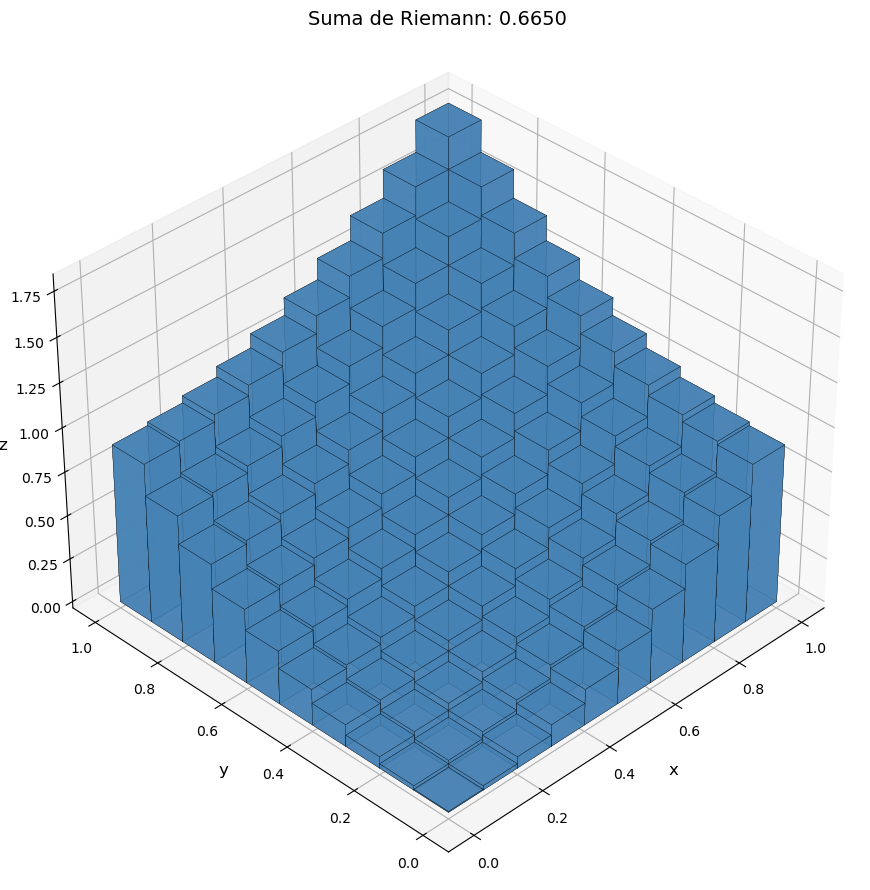

Rectángulo - n=100 suma de Riemann: 0.6666500000000005


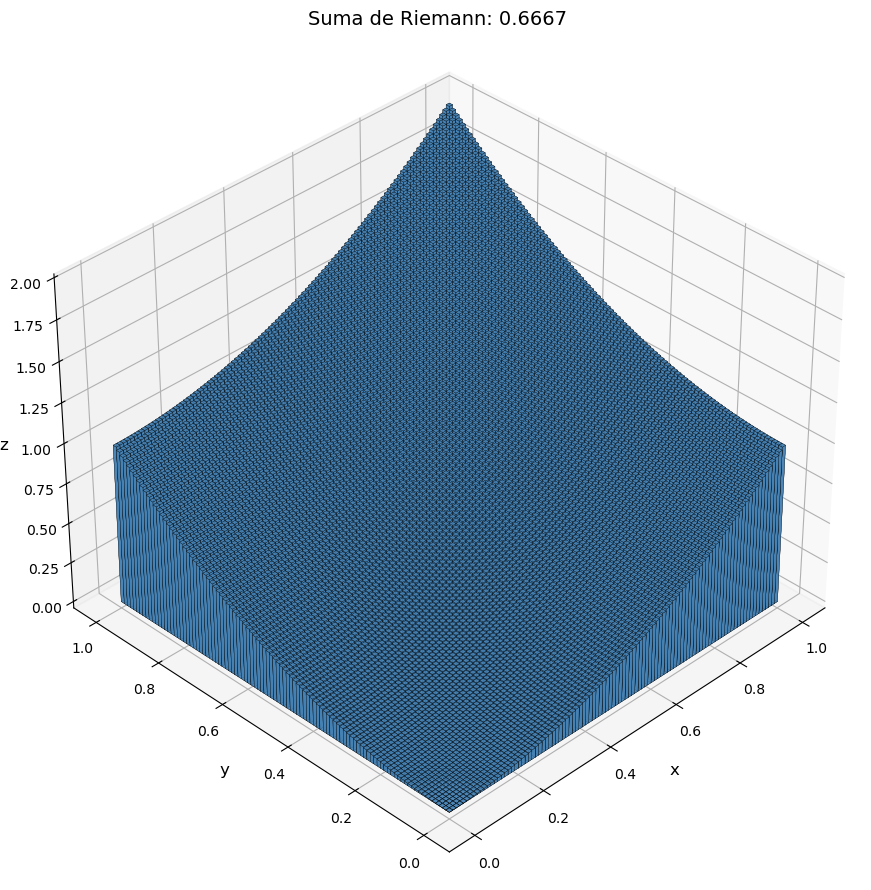

Rectángulo - n=1000 suma de Riemann: 0.666666499999998


In [5]:
n_list_of_values = [10, 100, 1000]

for n in n_list_of_values:
    plot_rectangulo(n, n)

Círculo - n=10 suma de Riemann:  25.1904


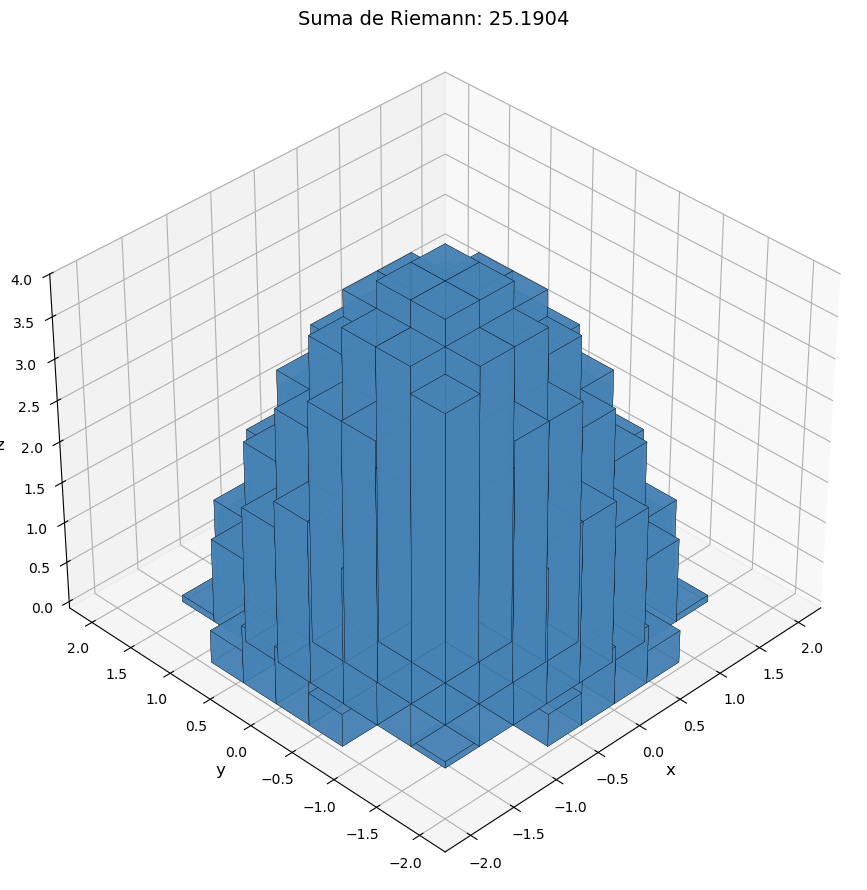

Círculo - n=100 suma de Riemann:  25.133112320000112


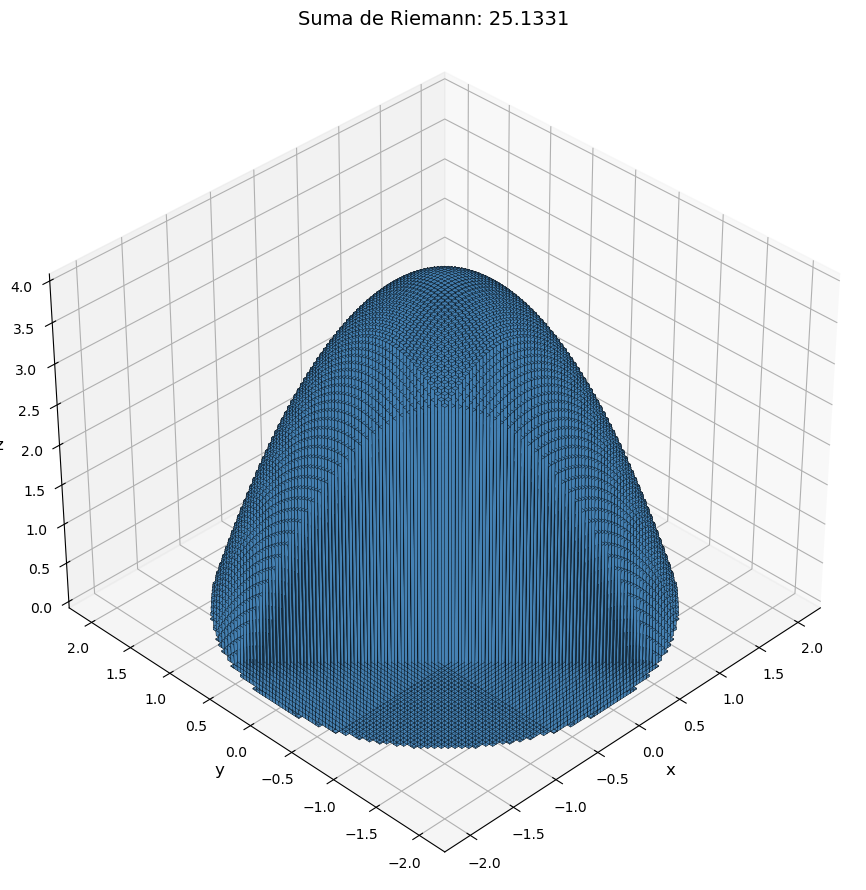

Círculo - n=1000 suma de Riemann:  25.132741457919373


In [6]:
n_list_of_values = [10, 100, 1000]

for n in n_list_of_values:
    plot_circulo(n, n)

Parábola - n=10 suma de Riemann: 2.880000000000002


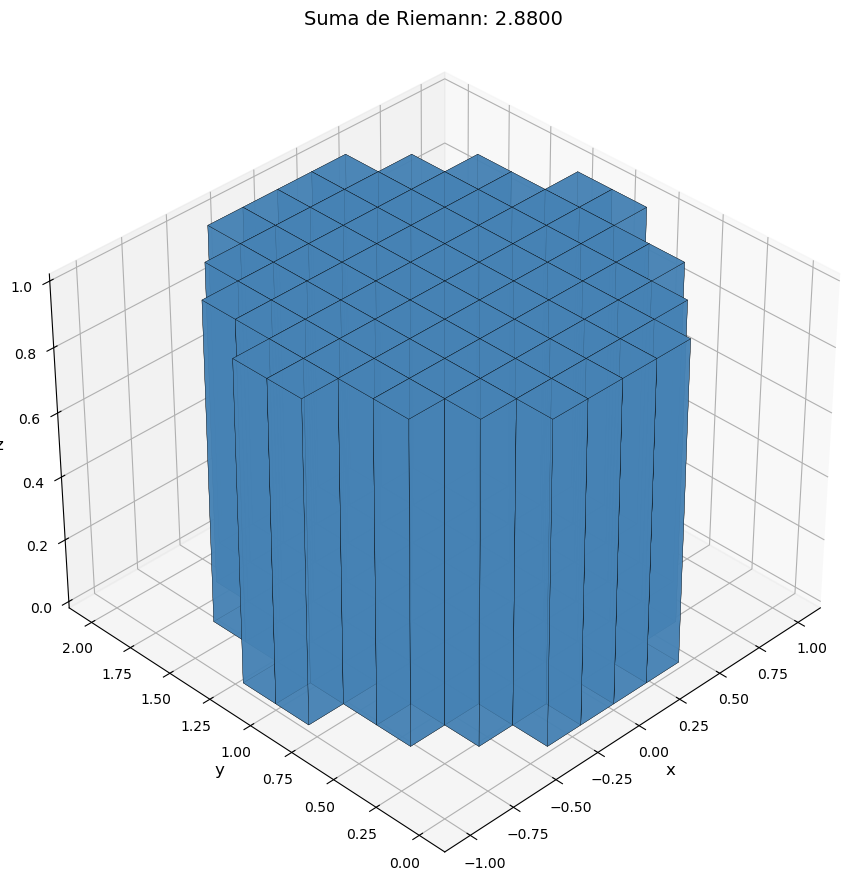

Parábola - n=100 suma de Riemann: 2.670399999999771


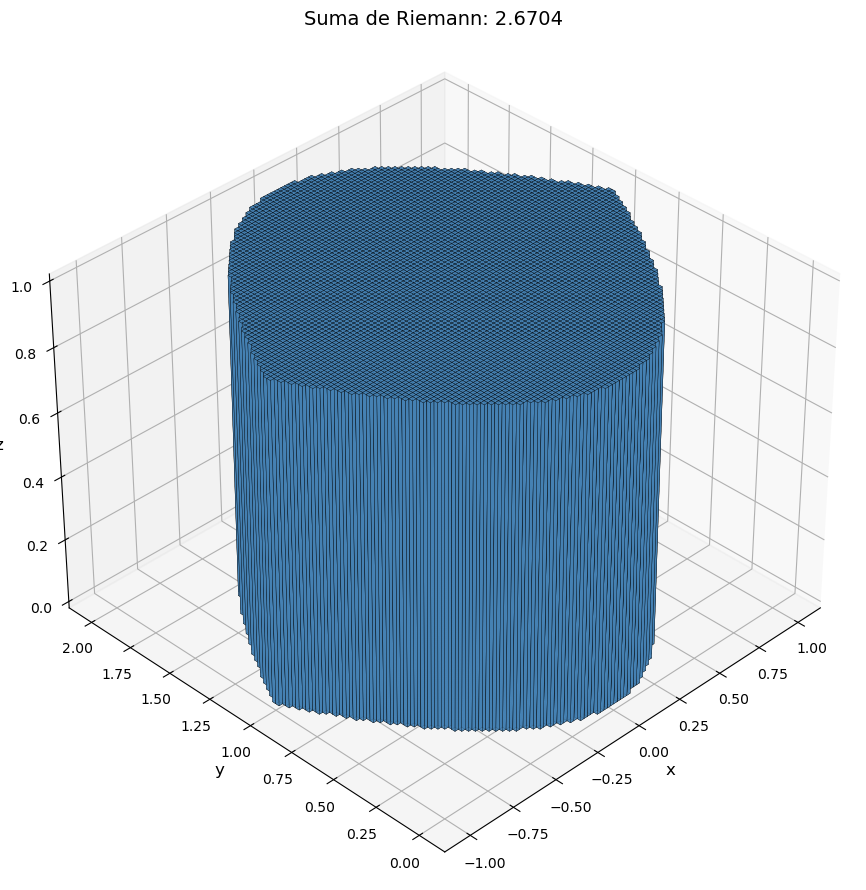

Parábola - n=1000 suma de Riemann: 2.6663999999933243


In [7]:
n_list_of_values = [10, 100, 1000]

for n in n_list_of_values:
    plot_parabola(n, n)

## 2.2 - Cálculo analítico paras las tres funciones anteriores:

Aquí, he usado un LLM para poder formatear el texto del desarrollo correctamente en LaTeX, pero todo el desarrollo fue realizado por mí, además he modificado todo el output del código en LaTeX para que siguiera la estructura del cálculo que hice:

### 1 integral del rectángulo

$$I = \iint_R (x^2 + y^2) dA$$

El diferencial de área se convierte en $dA = dy dx$:

$$I = \int_{0}^{1} \int_{0}^{1} (x^2 + y^2) dy dx$$

Dado que la región $R$ es $[0,1] \times [0,1]$, las variables x e y están acotadas entre los mismos valores, esto es decir, $0 \leq x \leq 1$ y $0 \leq y \leq 1$, lo que indica que se puede ver como una integral de tipo I y II al mismo tiempo!

Calculamos la integral más interna con respecto a $y$, así que tratamos a $x^2$ como una constante:
$$\int_{0}^{1} (x^2 + y^2) dy = \left[ x^2y + \frac{y^3}{3} \right]_{0}^{1}$$

Evaluamos con la regla de Barrow para los límites superior e inferior $y=1$ y $y=0$:
$$= \left( x^2(1) + \frac{(1)^3}{3} \right) - \left( x^2(0) + \frac{(0)^3}{3} \right)$$
$$= \left( x^2 + \frac{1}{3} \right) - (0)$$
$$= x^2 + \frac{1}{3}$$

Sustituimos el resultado obtenido, en la integral más grande, e integramos con respecto a x:
$$I = \int_{0}^{1} \left( x^2 + \frac{1}{3} \right)dx$$
$$= \left[ \frac{x^3}{3} + \frac{1}{3}x \right]_{0}^{1}$$

Evaluamos la variable $x$ en los límites $x=1$ y $x=0$:
$$= \left( \frac{(1)^3}{3} + \frac{1}{3}(1) \right) - \left( \frac{(0)^3}{3} + \frac{1}{3}(0) \right)$$
$$= \left( \frac{1}{3} + \frac{1}{3} \right) - (0)$$
$$= \frac{2}{3}$$

Entonces, el resultado de la integral es
$$I = \frac{2}{3}$$

**Que equivale aproximadamente al decimal periódico $0.6666666667...$**

### 2 integral del círculo

$$I = \iint_R (4 - x^2 - y^2) dA$$

La región $R$ a integrar es $x^2 + y^2 \leq 4$, por lo que podemos usar coordenadas polares, ya que la región es circular, cumple la función de una circunferencia ($x^2 + y^2 = r^2$).

Primero que nada, expresamos $f(x, y) = 4 - x^2 - y^2$ como $f(x, y) = 4 - (x^2 + y^2)$, para poder reemplazar $x^2 + y^2$ por $r^2$, ya que $x^2 + y^2 = r^2$, así que realizamos el cambio de variables:

$$f(r, \theta) = 4 - r^2$$

Notamos que los límites de integración para la integral son:

$$0 \leq r \leq 2$$
puesto que $r^2 = 4$, y para $\theta$:
$$0 \leq \theta \leq 2\pi$$



Ahora, el diferencial del área en coordenadas polares es $dA = r dr d\theta$, donde $r$ es el determinante del Jacobiano, que se obtiene con las derivadas parciales de x e y con respecto a $r$ y $\theta$, pero el determinante del Jacobiano siempre en estos casos nos da como resultado $r$, así que no es necesario hacer el cálculo, por lo que procedemos armando la integral con los límites mencionados anteriormente:

$$I = \int_{0}^{2\pi} \int_{0}^{2} (4 - r^2) r dr d\theta$$

Aplicamos la propiedad distributiva para el determinante del Jacobiano = $r$

$$I = \int_{0}^{2\pi} \int_{0}^{2} (4r - r^3) dr d\theta$$

Calculamos la integral más interna con respecto a la variable $r$:
$$\int_{0}^{2} (4r - r^3)dr = \left[ \frac{4r^2}{2} - \frac{r^4}{4} \right]_{0}^{2} = \left[ 2r^2 - \frac{r^4}{4} \right]_{0}^{2}$$


Evaluamos, con la regla de Barrow, los límites superior e inferior $r=2$ y $r=0$:
$$= \left( 2(2)^2 - \frac{(2)^4}{4} \right) - \left( 2(0)^2 - \frac{(0)^4}{4} \right)$$

$$= \left( 2(4) - \frac{16}{4} \right) - (0)$$

$$= (8 - 4) = 4$$

Sustituimos el resultado obtenido, en la integral más grande, e integramos con respecto a $\theta$:
$$I = \int_{0}^{2\pi} 4 d\theta$$
$$= \left[ 4\theta \right]_{0}^{2\pi}$$

Evaluamos la variable $\theta$ en los límites $\theta=2\pi$ y $\theta=0$:
$$= \left( 4(2\pi) \right) - \left( 4(0) \right)$$

$$= 8\pi - 0$$

$$= 8\pi$$

El resultado de la integral es
$$I = 8\pi$$

### 3 integral de las parábolas

$$I = \iint_R 1 dA$$

Dado que la región $R$ a integrar está definida por $x^2 \leq y \leq 2 - x^2$, podemos encontrar los límites de $x$ igualando las ecuaciones de las curvas en las cuales está restringido $y$: 

$x^2 = 2 - x^2 \implies 2x^2 = 2 \implies x^2 = 1$, 

por lo que $x = 1$ $\land$ $x = -1$

Los límites son para $x$ están dados por la inecuación triple:
$$-1 \leq x \leq 1$$
 
Mientras que los límites para $y$ ya están dados por el enunciado al inicio:
$$x^2 \leq y \leq 2 - x^2$$

Entonces, tomando el diferencial del área como en $dA = dy dx$ y armando la integral con los límites, primero la integral de más adentro con respecto a $y$ ($dy$), y luego la integral de más afuera con respecto a $x$, ya que la integral "general" es de tipo I, puesto que los límites constantes están en la variable $x$, mientras que los límites entre curvas están en la variable $y$. Debemos usar los límites en la integral interior expresados con respecto a $x$, puesto que la integral de más afuera recibe términos de $x$ para poder integrar y reemplazarlos por constantes al resolver la integral, de lo contrario nos quedarían términos con la variable $y$ dando vueltas:
$$I = \int_{-1}^{1} \int_{x^2}^{2 - x^2} 1 dy dx$$

Calculamos la integral más interna con respecto a $y$:
$$\int_{x^2}^{2 - x^2} 1 dy = \left[ y \right]_{x^2}^{2 - x^2}$$

Evaluamos con la regla de Barrow los límites superior e inferior $y=2-x^2$ y $y=x^2$:
$$= \left( 2 - x^2 \right) - \left( x^2 \right)$$
$$= 2 - 2x^2$$

Sustituimos el resultado de la integral de dentro, en la integral "general", e integramos con respecto a la variable $x$:
$$\int_{-1}^{1} \left( 2 - 2x^2 \right)dx$$
$$= \left[ 2x - \frac{2x^3}{3} \right]_{-1}^{1}$$

Evaluamos la variable $x$ en los límites $x=1$ y $x=-1$:
$$= \left( 2(1) - \frac{2(1)^3}{3} \right) - \left( 2(-1) - \frac{2(-1)^3}{3} \right)$$

$$= \left( 2 - \frac{2}{3} \right) - \left( -2 + \frac{2}{3} \right)$$

$$= \left( \frac{4}{3} \right) - \left( -2 + \frac{2}{3} \right)$$

$$= \left( \frac{4}{3} \right) - \left( -\frac{4}{3} \right) = 2 \cdot \frac{4}{3}= \frac{8}{3}$$

Entonces, el resultado de la integral es
$$I = \frac{8}{3}$$

**Que equivale aproximadamente al decimal periódico $2.6666666667...$**

## 2.3 - Análisis de convergencia

In [8]:
import pandas as pd # Para hacer la tabla pedida en el enunciado
from IPython.display import display # Para hacer la tabla pedida en el enunciado

'''Hacemos una función dinámica para calcular el error relativo, dado un valor aproximado 
por la suma de Riemann, y el valor exacto calculado a mano en el ítem anterior:'''
def calculate_relative_error(riemann_sum, exact_value):
    
    if exact_value == 0:
        return 0 # Evitamos dividir por cero.
    
    numerator = riemann_sum - exact_value
    denominator = exact_value
    result = abs(numerator / denominator) * 100
    # Dado que obtenemos decimales dados en forma exponencial, redondeamos a 6 decimales:
    result_rounded = float(round(result,6))

    return result_rounded

def compute_sum(f, x_range, y_range, n, mask=None):
    ''' Debemos volver a calcular la suma de Riemann para cada caso, por cómo está
    construida la función graficar_riemann, porque no tiene output. Una forma más
    eficiente sería modificar graficar_riemann para que devuelva la suma, pero 
    por simplicidad lo dejamos así:'''
    suma = calculate_riemann_sum(x_range, y_range, n, n, f, mask)
    return suma

'''Construimos una lista con los casos a evaluar, cuyos values son funciones lambda, rangos y
valores exactos que necesitamos como parámetros para llamar a la función compute_sum  y   así
calcular el error relativo:'''

cases = [
    {
        "Computando suma para": "Rectángulo",
        "f": lambda x, y: x**2 + y**2,
        "x_range": (0, 1),
        "y_range": (0, 1),
        "mask": lambda x, y: 0 <= x <= 1 and 0 <= y <= 1,
        "exact": 2 / 3
    },
    {
        "Computando suma para": "Círculo",
        "f": lambda x, y: 4 - x**2 - y**2,
        "x_range": (-2, 2),
        "y_range": (-2, 2),
        "mask": lambda x, y: x**2 + y**2 <= 4,
        "exact": 8 * np.pi # 8 * pi
    },
    {
        "Computando suma para": "Parábola",
        "f": lambda x, y: 1,
        "x_range": (-1, 1),
        "y_range": (0, 2),
        "mask": lambda x, y: x**2 <= y <= 2 - x**2,
        "exact": 8 / 3
    }]

rows = []

for case_to_eval in cases:
    for n in [10, 100, 1000]:
        
        suma = compute_sum(case_to_eval["f"], # Función a evaluar
                case_to_eval["x_range"], # Rango en x
                case_to_eval["y_range"], # Rango en y
                n, # Número de particiones dinámico (para n=1000 demora mucho)
                case_to_eval["mask"]) # Parámetro que define la región a integrar!
        
        # Para cada caso, guardamos los resultados en un diccionario, y hacemos
        # append para luego armar un DF con todas esas rows, y mostrarlo con display
        # para que se vea como una tabla:
        
        current_dict = {
            "Caso de función": case_to_eval["Computando suma para"],
            "Valor de n": n,
            "Suma de Riemann": suma,
            "Valor exacto": case_to_eval["exact"],
            "% de Error relativo": calculate_relative_error(suma, case_to_eval["exact"])
        }
        rows.append(current_dict)
    
# Armamos el DF y lo mostramos>
df = pd.DataFrame(rows)\
    .style.hide(axis="index")
display(df)

Se ve que en todos los casos, a mayor cantidad de particiones, el error va disminuyendo, pero en algunos casos, como en la parábola, decrece en menor medida y, en otros casos, a medida que n aumenta, el error relativo puede incluso incrementar eventualmente (para algunos casos de n entre 10 y 1000 que he sacado del cálculo final en la tabla, así que no se ven), pero a medida que n tiende al infinito, el error relativo tiende a ser 0.

En la práctica, se espera que para un valor de particiones ****{nx, ny}**** grandes, el error relativo sea pequeño, **En otras palabaras: a mayor valor de n, menor error relativo.**

## 2.4 Ejemplo propio.

Como no hay restricción sobre el tipo de integral que plantear en esta parte, planteamos una integral simple diferente a las anteriores:

La función será:

$$f(x, y) = x + y$$

Y la región de integración que delimita el cálculo que haremos con la integral doble será el triángulo con vértices(0,0), (0,20) y (5,0). 

Como vemos, lidiamos con una región de tipo I , ya que la variable $x$ está entre constantes, y la variable $y$ están entre la función constante $y=0$ por debajo, y la función $y = 20 - (20/5)\cdot x$ por arriba, que equivale a 

$y=20 -4x$.

(Esta función también se puede ver como una integral doble de tipo II, con límites entre 0 y 20 para la variable $y$)

In [9]:
def function_triangulo(x, y):
    return x + y

def mask_triangulo(x, y):

    x_mask = 0 <= x <= 5
    y_mask = 0 <= y <= (20 -4*x)
    
    return x_mask and y_mask

### Cálculo analítico de la función que propusimos

$$f(x, y) = x + y$$

Como la región de integración está delimitada por los vértices $(0,0)$, $(0,20)$ y $(5,0)$, tomamos la región de tipo I como mencionamos, y miramos la variable $x$ entre constantes, tal que $0 <= x <= 5$ 

mientras que la variable $y$ está delimitada por la función constante $y = 0$ por debajo, y la función $y = 20 - 4x$ por arriba.

Tomamos el diferencial de área siguiendo el orden planteado $dA = dy dx$:

$$I = \int_{0}^{5} \int_{0}^{20 - 4x} (x + y) dy dx$$

Calculamos la integral más interna con respecto a la variable $y$, mirando a $x$ como una constante:
$$\int_{0}^{20 - 4x} (x + y)\, dy = \left[ xy + \frac{y^2}{2} \right]_{0}^{20 - 4x}$$

Evaluamos la integral interna con la regla de Barrow para los límites superior e inferior $y = 20 - 4x$ e  $y = 0$:

$$= x(20 - 4x) + \frac{(20 - 4x)^2}{2} - (x(0) + \frac{(0)^2}{2})$$

$$= x(20 - 4x) + \frac{(20 - 4x)^2}{2} - (0)$$

$$= 20x - 4x^2 + \frac{(400 - 160x + 16x^2)}{2}$$

$$= 20x - 4x^2 + 200 - 80x + 8x^2$$

$$= 4x^2 -60x +200 $$

Reemplazamos el resultado obtenido de calcula la integrar interior, en la integral externa más "general" e integramos con respecto a $x$:

$$I = \int_{0}^{5} (4x^2 -60x +200) dx$$

Resolvemos:

$$I = \left[ \frac{4x^3}{3} - \frac{60x^2}{2} + 200x \right]_{0}^{5}$$

$$= \left[ \frac{4x^3}{3} -30x^2 + 200x \right]_{0}^{5}$$

Con la regla de Barrow, nuevamente, evaluamos $x$ entre los límites de integración superior e inferior $x = 5$ y $x = 0$:

$$= \left(\frac{4(5)^3}{3} - 30(5)^2 + 200(5) \right) - \left(\frac{4(0)^3}{3} - 30(0)^2 + 200(0) \right)$$

$$= \left(\frac{4(5)^3}{3} - 30(5)^2 + 200(5) \right) - 0$$

$$= \left(\frac{500}{3} - 750 + 1000 \right)$$

$$= \frac{500}{3} +250 = \frac{500}{3} +\frac{750}{3} = \frac{1250}{3}$$

Entonces, el resultado numérico de la integral es

$$I = \frac{1250}{3}$$

**Que equivale aproximadamente al valor decimal $416.6666667$**


Límites para x e y, necesarios para el cálculo de la suma de Riemann mediante la función graficar_riemann, ya que la función no toma funciones, necesita el valor mínimo y máximo para cada eje coordenado, porque luego la función mask se encarga de delimitar entre funciones los límites de integración:

In [10]:
triangulo_x_range = (0, 5)
triangulo_y_range = (0, 20)

# Además, como calculamos analíticamente, el resultado exacto es la fracción 1250/3:
triangulo_exact_value = 1250 / 3

Triángulo - n=10: suma de Riemann = 481.25


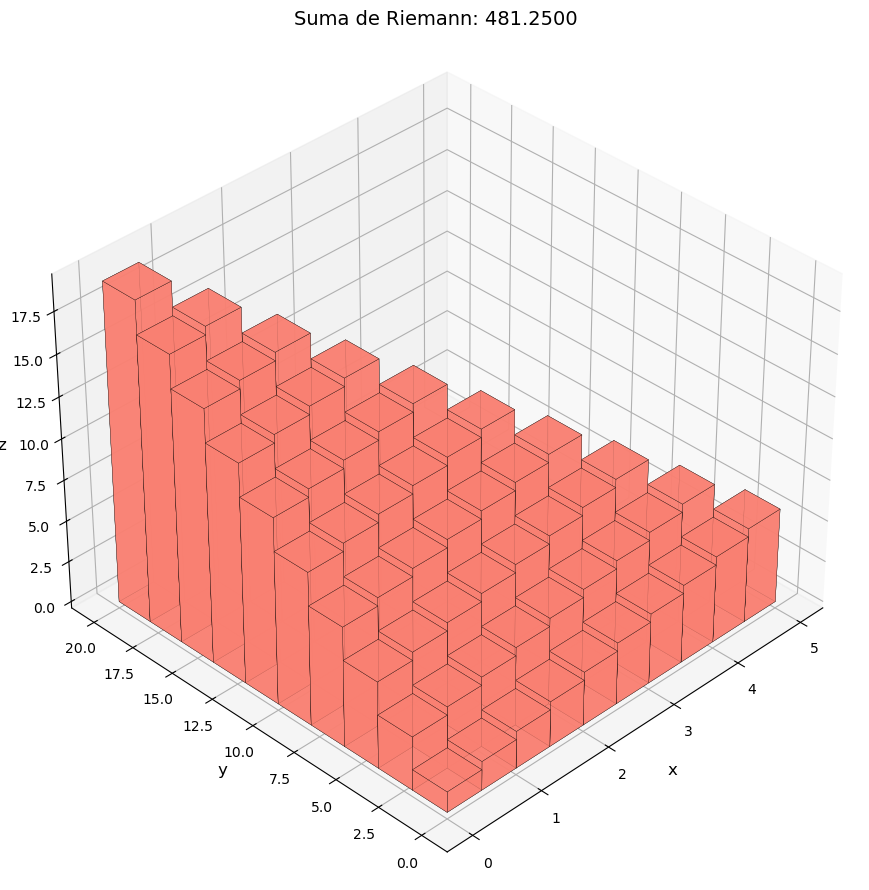

Triángulo - n=100: suma de Riemann = 416.45474999999993


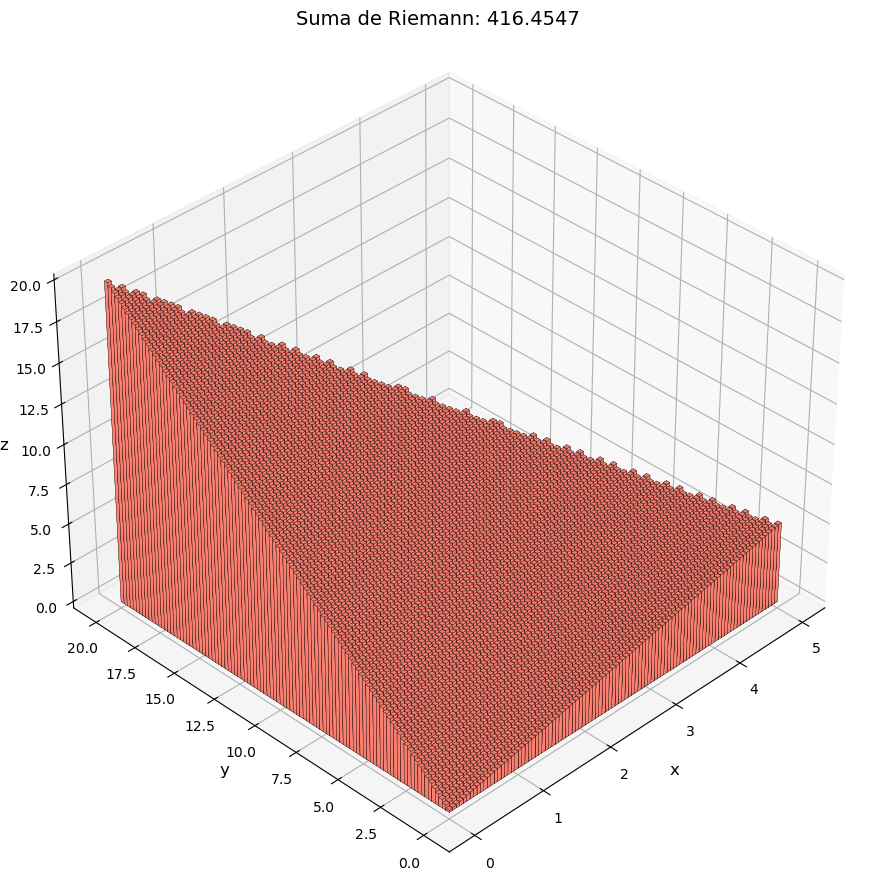

Triángulo - n=1000: suma de Riemann = 416.93490524999095


In [11]:
# Visualización usando graficar_riemann
for n in [10, 100, 1000]:
    if n > 200:
        riemann_sum = calculate_riemann_sum(triangulo_x_range, triangulo_y_range, n, n, function_triangulo, mask_triangulo)
        print(f"Triángulo - n={n}: suma de Riemann = {riemann_sum}")
        continue
    
    fig, ax, suma = graficar_riemann(triangulo_x_range, triangulo_y_range, n, n, function_triangulo, mask_triangulo, color='salmon')
    print(f"Triángulo - n={n}: suma de Riemann = {suma}")
    plt.savefig(f'outputs/riemann_triangulo_{n}.png', dpi=150, bbox_inches='tight')
    plt.show()

Finalmente, realizamos el análisis de convergencia para la función, siguiendo el ejemplo de la parte anterior:

In [12]:
triangulo_rows = []

for n in [10, 100, 150, 200, 250, 300, 1000]:
    
    suma = compute_sum(function_triangulo, triangulo_x_range, triangulo_y_range, n, mask_triangulo)
    
    n_list_of_values = {
        "Valor de n": n,
        "Suma de Riemann": suma,
        "Valor exacto": triangulo_exact_value,
        "% de Error relativo": calculate_relative_error(suma, triangulo_exact_value)
    }
    
    triangulo_rows.append(n_list_of_values)

# Como antes, creamos un DF y lo mostramos con display para como se reduce el error relativo:
df_triangulo = pd.DataFrame(triangulo_rows)\
    .style.hide(axis="index")
    
display(df_triangulo)

El error relativo es oscilante en este caso, porque para n=100 es menor que para n=1000, que es una particion mayor, a veces ocurre esto con el cálculo porque algunos sectores quedan afuera del sector al cual se le calcula la suma de Riemann, pero según el número de particiones tiende al infinito, el error relativo tiende a ser 0.

Entonces, en genera, como vemos, puede ser que el porcentaje de error relativo sea oscilante para valores de **n** muy bajos, incluso puede ser que aumente, pero a medida que **n** es mayor, el error debería disminuir, **tendiendo a 0 en el infinito**.